# **Estudo Dirigido 9 - Momentos**

**Aluno:** André Paiva Conrado Rodrigues

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

Para esta atividade é utilizada a `machinevisiontoolbox` do Peter Corke e a biblioteca `matplotlib` para exibição de imagens.

In [9]:
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *
from matplotlib import pyplot as plt

## 2 - Abrindo a imagem

Primeiramente, é importada a imagem e é feita a binarização.

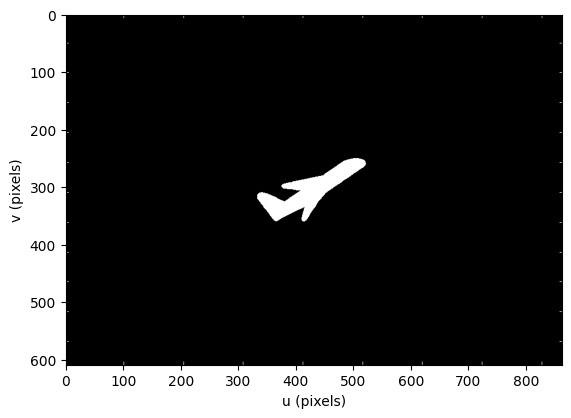

In [13]:
# Leitura da imagem original
aviao = Image.Read("aviao_ed.png", dtype='float')
aviao_bin = (aviao.colorspace("L*a*b*").plane("L*:") >= 0.5)
aviao_bin.disp()

## 3 - Área do objeto

A área do objeto pode ser obtida por meio do momento $m_{00}$.

In [15]:
area = aviao_bin.mpq(0, 0)
print(area)

7275


## 4 - Centroide do objeto

O centroide do objeto, em coordenadas $(u_{c}, v_{c})$ pode ser calculada do seguinte modo:

$$u_{c} = \dfrac{m_{10}}{m_{00}}$$
$$v_{c} = \dfrac{m_{01}}{m_{00}}$$

In [16]:
uc = aviao_bin.mpq(1, 0) / area
vc = aviao_bin.mpq(0, 1) / area
print(f'uc = {uc}; vc = {vc}')

uc = 423.200412371134; vc = 306.1018556701031


## 5 - Momento central e Matriz de Inércia

Os momentos centrais $\mu_{pq}$ são calculados em relação aos momentos $m_{pq}$ do seguinte modo:

$$\mu_{10} = 0$$
$$\mu_{01} = 0$$
$$\mu_{20} = m_{20} - \dfrac{m^{2}_{10}}{m_{00}}$$
$$\mu_{02} = m_{02} - \dfrac{m^{2}_{01}}{m_{00}}$$
$$\mu_{11} = m_{11} - \dfrac{m_{10}m_{01}}{m_{00}}$$

A matriz de inércia é dada por:

$$\boldsymbol{J} = \begin{pmatrix} 
  \mu_{20} & \mu_{11}\\ 
  \mu_{11} & \mu_{02} 
\end{pmatrix}$$

In [17]:
mu_20 = aviao_bin.mpq(2, 0) - ((uc**2)/area)
mu_02 = aviao_bin.mpq(0, 2) - ((vc**2)/area)
mu_11 = aviao_bin.mpq(1, 1) - ((uc*vc)/area)

J = np.array([[mu_20, mu_11],[mu_11, mu_02]])
print(J)

[[1.34653849e+09 9.35241177e+08]
 [9.35241177e+08 6.99498508e+08]]


## 6 - Elipse equivalente

